# Discrete Fourier Transform as a Matrix
In this notebook, we will implement the discrete Fourier transform (DFT) as a matrix operation. This involves constructing the Fourier Matrix $F$. Although not the most computationally efficient implementation of the DFT, it allows us to see under the hood of what's going on in the transform. Let's begin by defining the length of the signal $N$ and creating a suitable harmonic basis vectors for it using the division of the unit circle into $N$ parts, the so called primitive $N$th root of unity $w=e^{-2\pi j/N}$.

In [20]:
import numpy as np

np.set_printoptions(precision=5, suppress=True)

N = 8
w = np.exp(-2.0*np.pi*1j/N) #Nth root of unity
print("w:", w)

w: (0.7071067811865476-0.7071067811865476j)


Then we create the Fourier matrix $F$ as powers of $w$. Remember this is the same as travelling around the unit circle.

In [26]:
def getFourierMatrix(N):
    '''
    Compute the Fourier matrix given length N
    '''
    w = np.exp(-2.0*np.pi*1j/N) #Nth root of unity
    W = np.zeros((N,N), np.complex)
    for i in range(N):
        for j in range(N):
            W[i,j] = w**(i*j)
    return W

F = getFourierMatrix(N)
print(F)

[[ 1.     +0.j       1.     +0.j       1.     +0.j       1.     +0.j
   1.     +0.j       1.     +0.j       1.     +0.j       1.     +0.j     ]
 [ 1.     +0.j       0.70711-0.70711j  0.     -1.j      -0.70711-0.70711j
  -1.     -0.j      -0.70711+0.70711j -0.     +1.j       0.70711+0.70711j]
 [ 1.     +0.j       0.     -1.j      -1.     -0.j      -0.     +1.j
   1.     +0.j       0.     -1.j      -1.     -0.j      -0.     +1.j     ]
 [ 1.     +0.j      -0.70711-0.70711j -0.     +1.j       0.70711-0.70711j
  -1.     -0.j       0.70711+0.70711j  0.     -1.j      -0.70711+0.70711j]
 [ 1.     +0.j      -1.     -0.j       1.     +0.j      -1.     -0.j
   1.     +0.j      -1.     -0.j       1.     +0.j      -1.     -0.j     ]
 [ 1.     +0.j      -0.70711+0.70711j  0.     -1.j       0.70711+0.70711j
  -1.     -0.j       0.70711-0.70711j -0.     +1.j      -0.70711-0.70711j]
 [ 1.     +0.j      -0.     +1.j      -1.     -0.j       0.     -1.j
   1.     +0.j      -0.     +1.j      -1.     -0.j  

To compare, let's use SciPy's built-in function to also compute the Fourier matrix $F$.

In [24]:
from scipy.linalg import dft

F_ = dft(N)
print(F_)
print("Difference:", np.linalg.norm(F-F_))

[[ 1.     +0.j       1.     +0.j       1.     +0.j       1.     +0.j
   1.     +0.j       1.     +0.j       1.     +0.j       1.     +0.j     ]
 [ 1.     +0.j       0.70711-0.70711j  0.     -1.j      -0.70711-0.70711j
  -1.     -0.j      -0.70711+0.70711j -0.     +1.j       0.70711+0.70711j]
 [ 1.     +0.j       0.     -1.j      -1.     -0.j      -0.     +1.j
   1.     +0.j       0.     -1.j      -1.     -0.j      -0.     +1.j     ]
 [ 1.     +0.j      -0.70711-0.70711j -0.     +1.j       0.70711-0.70711j
  -1.     -0.j       0.70711+0.70711j  0.     -1.j      -0.70711+0.70711j]
 [ 1.     +0.j      -1.     -0.j       1.     +0.j      -1.     -0.j
   1.     +0.j      -1.     -0.j       1.     +0.j      -1.     -0.j     ]
 [ 1.     +0.j      -0.70711+0.70711j  0.     -1.j       0.70711+0.70711j
  -1.     -0.j       0.70711-0.70711j -0.     +1.j      -0.70711-0.70711j]
 [ 1.     +0.j      -0.     +1.j      -1.     -0.j       0.     -1.j
   1.     +0.j      -0.     +1.j      -1.     -0.j  

Let's wee what $F$ looks like as an image if $N$ was large.

In [29]:
N_large = 128
F_large = getFourierMatrix(N_large)

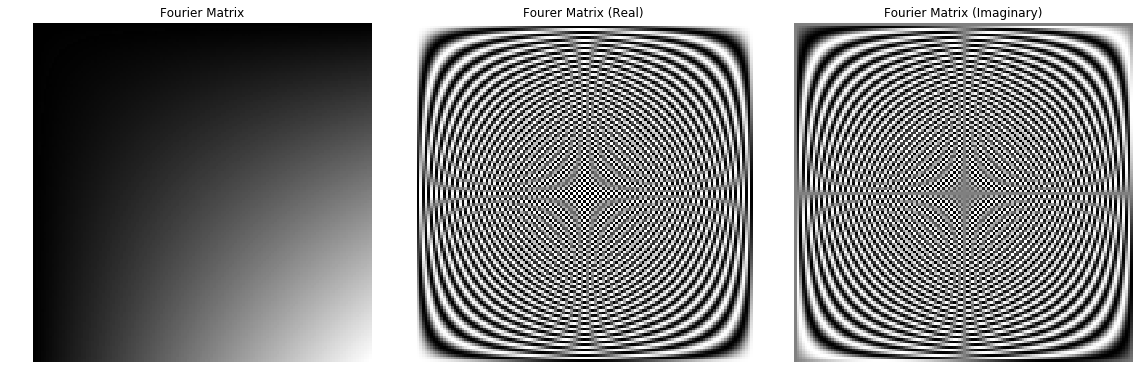

In [33]:
#plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

plt.gray()
plt.tight_layout()

ax[0].imshow(np.abs(F_large), interpolation="nearest")
ax[0].axis('off')
ax[0].set_title('Fourier Matrix')
ax[1].imshow(np.real(F_large), interpolation="nearest")
ax[1].axis('off')
ax[1].set_title('Fourer Matrix (Real)')
ax[2].imshow(np.imag(F_large), interpolation="nearest")
ax[2].axis('off')
ax[2].set_title('Fourier Matrix (Imaginary)')

plt.show()